<a href="https://colab.research.google.com/github/Joshna9380/OIBSIP/blob/main/Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/retail_sales_dataset.csv')

In [4]:
print(df.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [10]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

In [12]:
print("Mean Sales:", df['Total Amount'].mean())
print("Median Sales:", df['Total Amount'].median())
print("Std Dev Sales:", df['Total Amount'].std())

Mean Sales: 456.0
Median Sales: 135.0
Std Dev Sales: 559.997631555123


In [14]:
daily_sales = df.groupby('Date')['Total Amount'].sum()

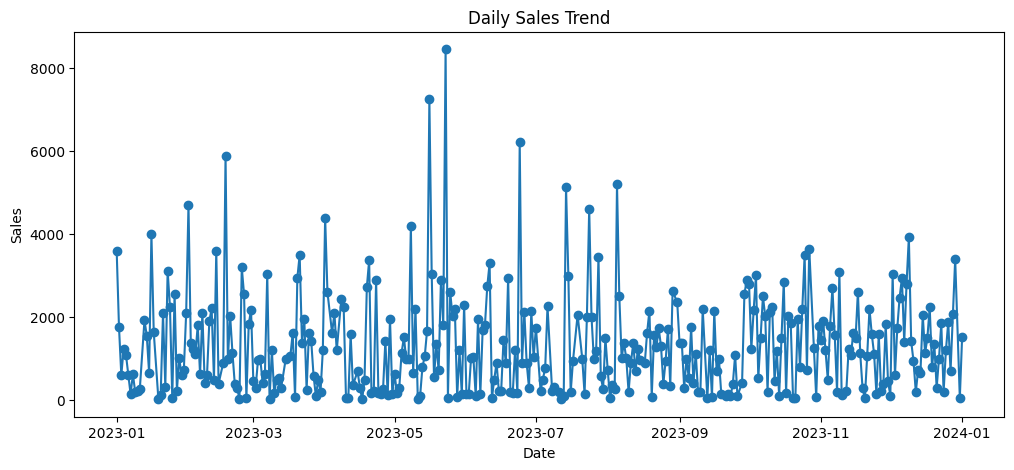

In [15]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [17]:
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()

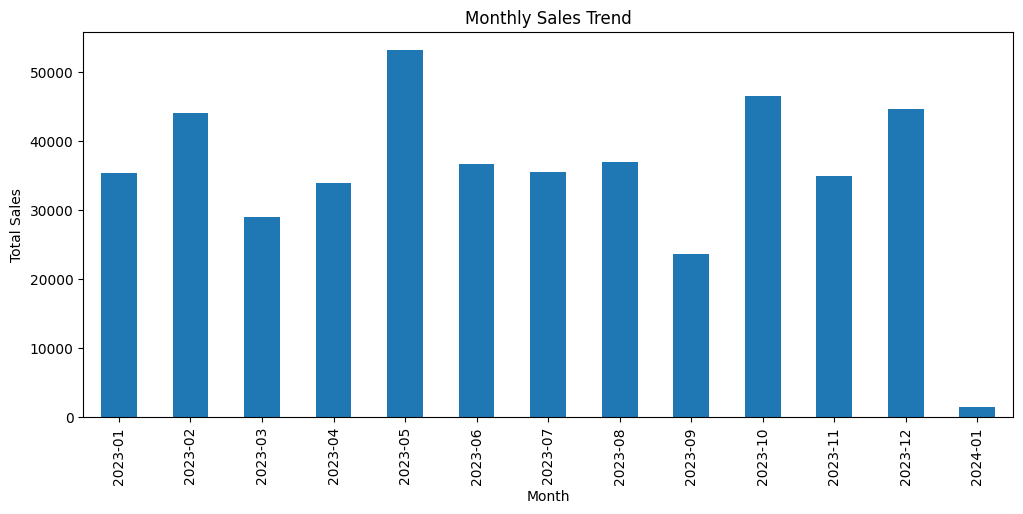

In [18]:
monthly_sales.plot(kind='bar', figsize=(12,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [20]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

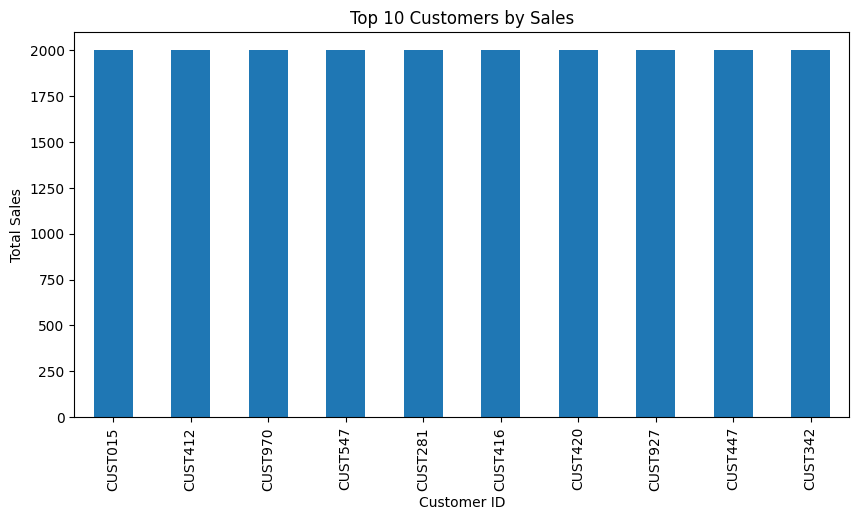

In [21]:
top_customers.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.show()

In [23]:
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
display(top_products)

,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


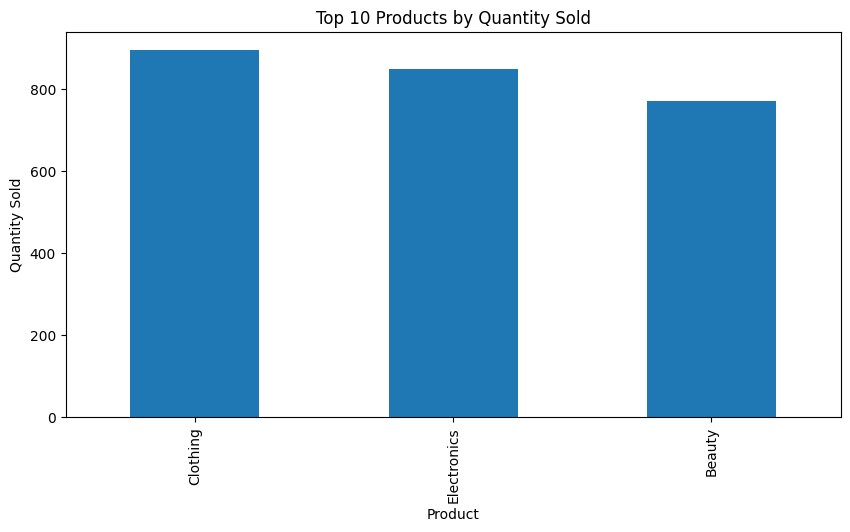

In [24]:
top_products.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()


In [26]:
df['Month'] = df['Date'].dt.month
pivot_table = df.pivot_table(values='Total Amount', index='Product Category', columns='Month', aggfunc='sum').fillna(0)
display(pivot_table)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product Category,,,,,,,,,,,,
Beauty,13930,14035,10545,11905,12450,10995,16090,9790,6320,15355,9700,12400
Clothing,13125,14560,15065,13940,17455,10170,8250,12455,9975,13315,15200,12070
Electronics,9925,15465,3380,8025,23245,15550,11125,14715,7325,17910,10020,20220


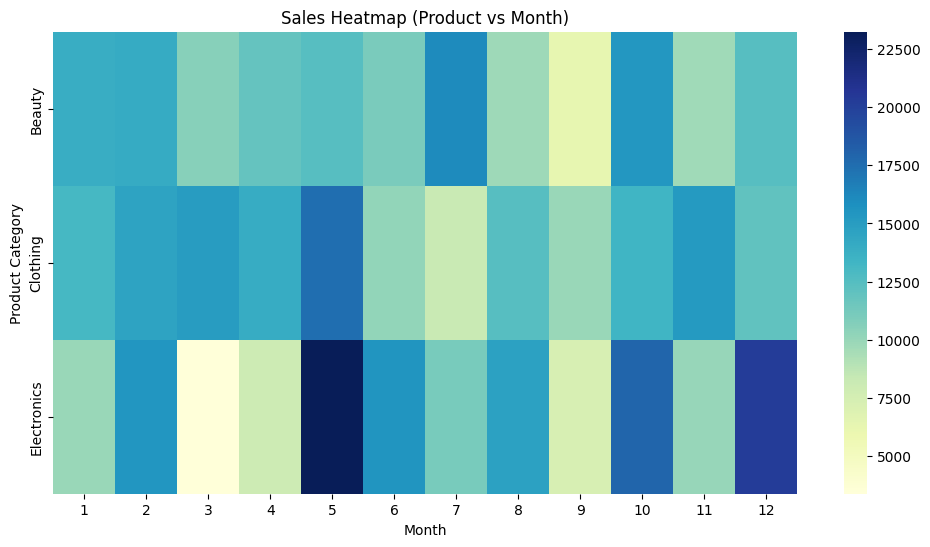

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Sales Heatmap (Product vs Month)")
plt.show()

In [29]:
print("📌 Recommendations:")
print("- Focus on promoting top-selling products during high-demand months.")
print("- Provide loyalty rewards for top customers to retain them.")
print("- Identify low-sales months and plan marketing campaigns.")
print("- Check underperforming products and optimize inventory.")

📌 Recommendations:
- Focus on promoting top-selling products during high-demand months.
- Provide loyalty rewards for top customers to retain them.
- Identify low-sales months and plan marketing campaigns.
- Check underperforming products and optimize inventory.
